## Ejercicio 3. 

Nos piden aplicar las funciones para:

***[1]***: Calcular el autovector asociado al autovalor más chico de la matríz L.

***[2]***: Calcular el autovector asociado al autovalor más grande de R.

Además, interpretar los valores que nos dan en términos del grafo.

También nos piden calcular los vectores ***s*** asociados a estos autovectores y comparar con la particion esperada con el grafo de ejemplo.


In [1]:
import numpy as np
from linalg import *

np.random.seed(42)

In [2]:
# Grafo de ejemplo
A_sample = np.array([
    [0, 1, 1, 1, 0, 0, 0, 0],
    [1, 0, 1, 1, 0, 0, 0, 0],
    [1, 1, 0, 1, 0, 0, 0, 0],
    [1, 1, 1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 1, 1, 1],
    [0, 0, 0, 0, 1, 0, 1, 1],
    [0, 0, 0, 0, 1, 1, 0, 1],
    [0, 0, 0, 0, 1, 1, 1, 0]
])

# Función para obtener el vector s
comunidades = lambda autovector: [1 if x > 0 else -1 for x in autovector] 

***[1]*** Calculamos el autovector asociado al segundo autovalor más chico de L ($\lambda>0$)

Este $\lambda_{min}$ esta asociado a un autovector $v_{min} \in \Re^{N}$ que se interpreta como.
$$\begin{cases}
    sign(v_i) = 1 & \text{ si museo}_i \in \text{comunidadA} \\
    sign(v_i) = -1 & \text{ si museo}_i \in \text{comunidadB} \\
\end{cases}$$ 

***N***: cantidad de musos

<center> <img src='img/comunidades_L.png' width=500, height=300> </center>

In [3]:
L_sample = calcula_L(A_sample)
segundo_autovalor_minimo_L, segundo_autovector_minimo_L = metpotI2(L_sample, mu=1e-5)

print("Segundo autovalor mínimo de L:", segundo_autovalor_minimo_L)
print("Comunidades (s): ", comunidades(segundo_autovector_minimo_L))

Segundo autovalor mínimo de L: 9.999999999919941e-06
Comunidades (s):  [-1, -1, -1, -1, 1, 1, 1, 1]


***[2]***: Calcular el autovector asociado al autovalor más grande de R.

Este $\lambda_{max}$ esta asociado a un autovector $v_ \in \Re^{N}$ que se interpreta como.
$$\begin{cases}
    sign(v_i) = 1 & \text{ si museo}_i \in \text{comunidadA} \\
    sign(v_i) = -1 & \text{ si museo}_i \in \text{comunidadB} \\
\end{cases}$$ 

<center> <img src='img/comunidades_R.png' width=500, height=300> </center>

In [4]:
R_sample = calcula_R(A_sample)
autovalor_maximo_R, autovector_maximo_R = metpot(R_sample)

print("Autovalor máximo para R:", autovalor_maximo_R)
print("Comunidades (s): ", comunidades(autovector_maximo_R))

Autovalor máximo para R: -2.986180212169343
Comunidades (s):  [1, 1, 1, 1, 1, 1, 1, 1]


## Ejercicio 4.

In [5]:
import geopandas as gpd 
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import networkx as nx
from template_funciones import * 

/home/sebastian/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [6]:
museos = gpd.read_file('https://raw.githubusercontent.com/MuseosAbiertos/Leaflet-museums-OpenStreetMap/refs/heads/principal/data/export.geojson')
barrios = gpd.read_file('https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/barrios/barrios.geojson')
D = museos.to_crs("EPSG:22184").geometry.apply(lambda g: museos.to_crs("EPSG:22184").distance(g)).round().to_numpy()
M = [3, 5, 10, 50]

def construir_grafo(A):
    G = nx.from_numpy_array(A) # Construimos la red a partir de la matriz de adyacencia
    # Construimos un layout a partir de las coordenadas geográficas
    G_layout = {i:v for i,v in enumerate(zip(museos.to_crs("EPSG:22184").get_coordinates()['x'],museos.to_crs("EPSG:22184").get_coordinates()['y']))}
    return G, G_layout

In [7]:
def graficar_particion(A, comunidades, titulo, ax):

    # Graficamos los barrios
    barrios.to_crs("EPSG:22184").boundary.plot(color='gray', ax=ax)

    # Construimos el grafo
    G, G_layout = construir_grafo(A)

    # Generamos colores para las particiones
    colores = plt.cm.Set1(np.linspace(0, 1, len(comunidades)))

    # Crear diccionario de colores para cada nodo
    node_colors = {}
    for i, particion in enumerate(comunidades):
        for nodo in particion:
            node_colors[nodo] = colores[i]

    # Crear lista de colores en el orden de los nodos del grafo
    node_color_list = [node_colors.get(nodo, 'lightgray') for nodo in G.nodes()]

    # Dibujar el grafo con colores por partición
    nx.draw_networkx_nodes(G, G_layout, 
                            node_color=node_color_list, 
                            node_size=100, 
                            alpha=0.8, 
                            ax=ax)

    # nx.draw_networkx_labels(G, G_layout, 
    #                         font_size=8, 
    #                         font_color='white', 
    #                         font_weight='bold', 
    #                         ax=ax)

    # Agregar leyenda
    legend_elements = [Line2D([0], [0], marker='o', color='w', 
                                markerfacecolor=colores[i], markersize=10, 
                                label=f'Partición {i+1}')
                        for i in range(len(comunidades))]

    # ax.legend(handles=legend_elements, loc='upper right')

    ax.set_title(titulo, fontsize=16)


#### Particiones óptimas calculadas con el método de modularidad:

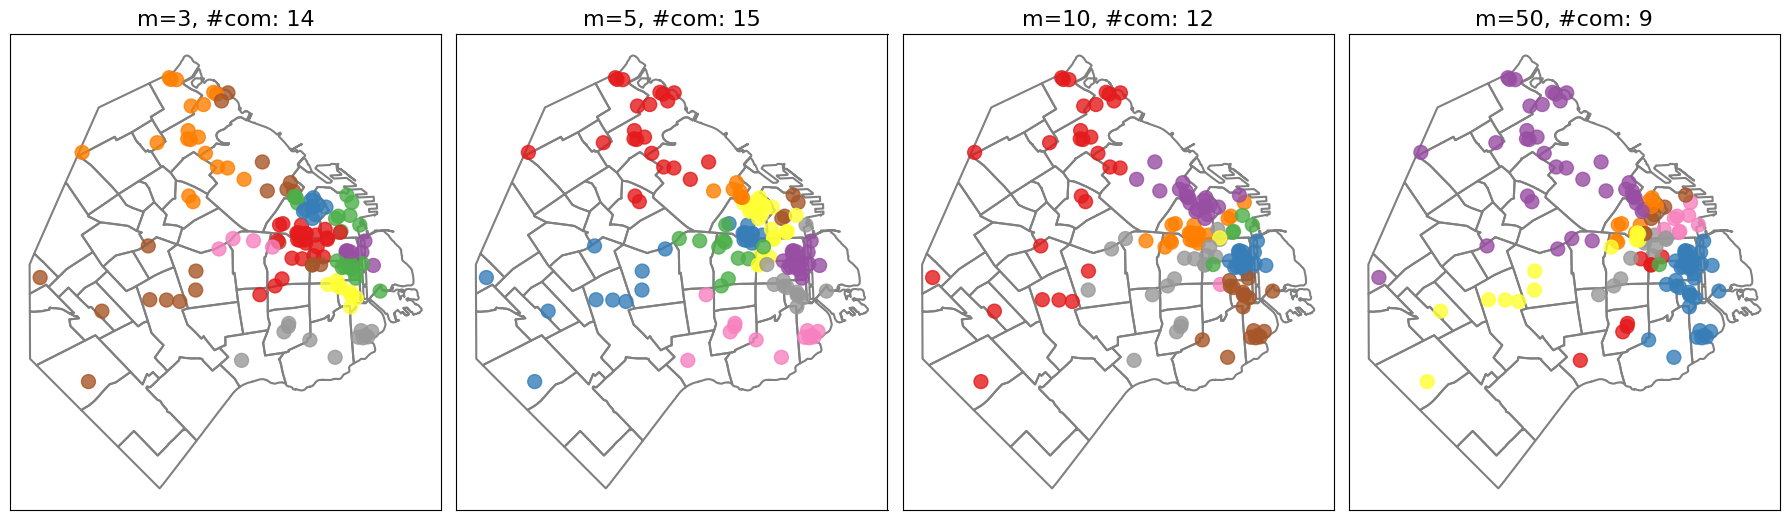

In [8]:
fig, axes = plt.subplots(1, len(M), figsize=(18, 6))

for i, m in enumerate(M):
    A = simetrizar_A(construye_adyacencia(D, m))
    comunidades = modularidad_iterativo(A)
    numero_de_comunidades = len(comunidades)
    graficar_particion(A, comunidades, titulo=f"m={m}, #com: {numero_de_comunidades}", ax=axes[i])

plt.tight_layout()
plt.show()

### <u> Análisis de modularidad </u>:

Vemos que algunas zonas estables:
- **Nuñez-Belgrano-Palermo** (comunas 12, 13, 14) se mantiene como comunidad, y la zona divisoria comienza en la cercanía de Recoleta, donde hay más museos.
- **Caballito-Flores-Parque Avellaneda-Mataderos** (comunas 6,7 y 9) forman otra comunidad que se sostiene para los distintos $m$.
- **Barracas-La Boca** se mantiene con algunos agregados en el caso $m=10$ y $m=50$.

Observamos también que el número de comunidades se reduce al aumentar el $m$ y, por consecuencia, el espacio que ocupa cada comunidad es más grande. Esto es porque aumentar el $m$ con el cual armamos la matríz A encuentra relaciones entre museos más distantes. Por ejemplo, con $m=50$ hay un museo en Nueva Pompeya conectado con un museo de Recoleta.



#### Particiones óptimas calculadas con el método de Laplaciano:

Como la convergencia de este método se define por cantidad de niveles y vemos que el método iterativo nos da menos que 16 comunidades, querríamos como mucho 16 particiones.
Entonces, vamos a probar con $k=4$ (16 particiones), excepto para el caso de $m=50$ donde en la partición de modularidad quedaron $9$.



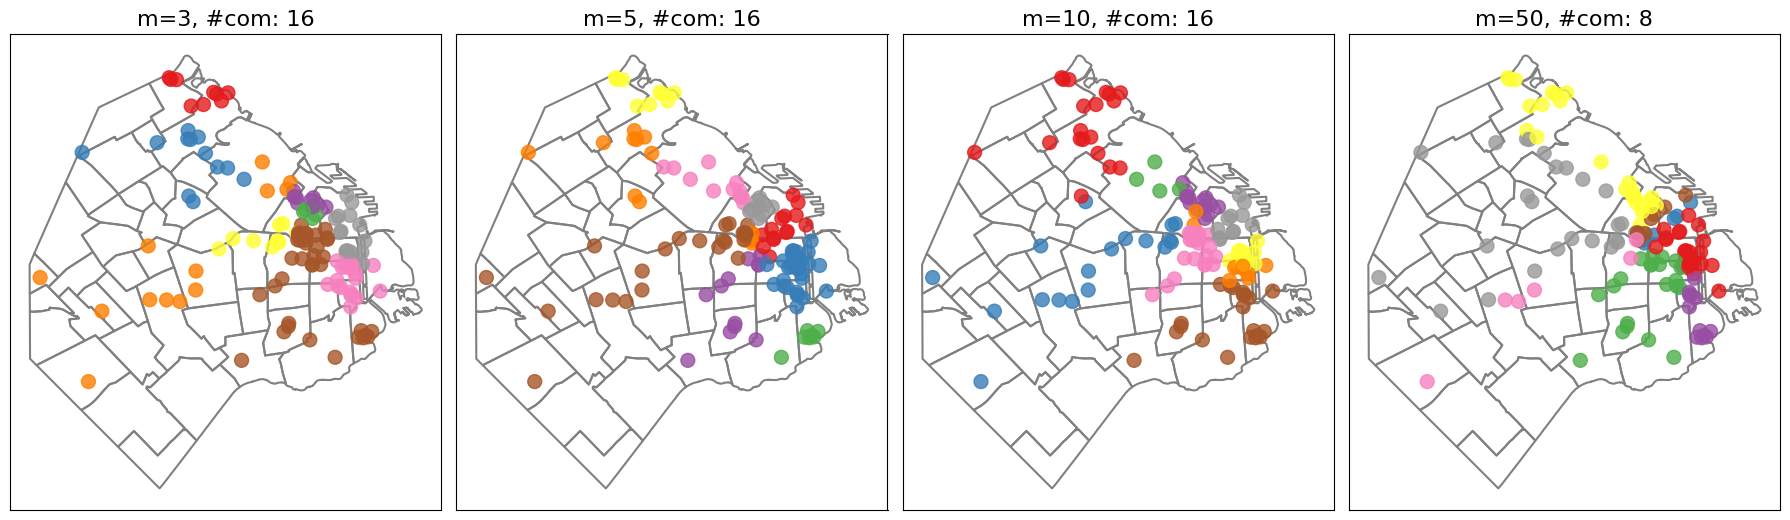

In [9]:
fig, axes = plt.subplots(1, len(M), figsize=(18, 6))

niveles = 4  # Número de niveles para el algoritmo de Laplaciano
for i, m in enumerate(M):
    A = simetrizar_A(construye_adyacencia(D, m))
    if m==50:
        niveles = 3
    comunidades = laplaciano_iterativo(A, niveles=niveles)
    numero_de_comunidades = len(comunidades)
    graficar_particion(A, comunidades, titulo=f"m={m}, #com: {numero_de_comunidades}", ax=axes[i])

plt.tight_layout()
plt.show()

### <u> Comparacion Laplaciano vs Modularidad: </u>

- Vemos que la zona del norte de CABA se subdivide en las particiones del Laplaciano. Por ejemplo, el bloque Nuñez-Belgrano-Palermo es ahora solo Nuñez-Saavedra y por otra parte Belgrano y una zona de Palermo y Palermo con el "comienzo" de Recoleta. 

- Por otro lado, el corredor de Caballito a Liniers que observamos no solo se mantiene sino que se agranda como una diagonal que llega hasta el centro donde hya más museos.

- El método de Laplaciano parece tener una división de comunidades con un mayor orden geográfico que el método por modularidad. Esto es más visible en el centro, la zona más poblada de museos.